#📌 Extracão

In [45]:
import pandas as pd

url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'



In [46]:
df_telecom = pd.read_json(url)

customer_df = pd.json_normalize(df_telecom['customer'])
phone_df = pd.json_normalize(df_telecom['phone'])
internet_df = pd.json_normalize(df_telecom['internet'])
account_df = pd.json_normalize(df_telecom['account'])

df_telecom_normalizado = pd.concat([df_telecom[['customerID', 'Churn']], customer_df, phone_df, internet_df, account_df], axis=1)

display(df_telecom_normalizado.head())

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformação

In [47]:
#Explorar as colunas do dataset e verificar seus tipos de dados:

df_telecom_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [48]:
#Explorar as colunas do dataset e verificar seus tipos de dados:

df_telecom_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [49]:
#Consultar o dicionário para entender melhor os significados das variáveis
df_churn = df_telecom_normalizado['Churn']
df_churn.head()


,Churn
0,No
1,No
2,Yes
3,Yes
4,Yes


In [ ]:
df_senior= df_telecom_normalizado['SeniorCitizen']
df_senior.head()

,SeniorCitizen
0,0
1,0
2,0
3,1
4,1


In [50]:
df_charges= df_telecom_normalizado['Charges.Monthly']
df_charges.head()

,Charges.Monthly
0,65.6
1,59.9
2,73.9
3,98.0
4,83.9


In [51]:
#checando se há valores nulos
df_telecom_normalizado.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [52]:
#checando se há valores duplicados
df_telecom_normalizado.duplicated().sum()

np.int64(0)

In [53]:
#Criando a coluna Contas_Diarias
df_telecom_normalizado['Contas_Diarias'] = df_telecom_normalizado['Charges.Monthly'] / 30
df_telecom_normalizado.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Contas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,2.796667


#📊 Carga e análise

In [54]:
#calculando a média
media = df_telecom_normalizado['Contas_Diarias'].mean()
media

np.float64(2.1573365900646757)

In [55]:
#Calculando a mediana
mediana = df_telecom_normalizado['Contas_Diarias'].median()
mediana

2.3433333333333333

In [56]:
#Calculando o desvio padrão
desvio_padrao = df_telecom_normalizado['Contas_Diarias'].std()
desvio_padrao

1.0043190628555607

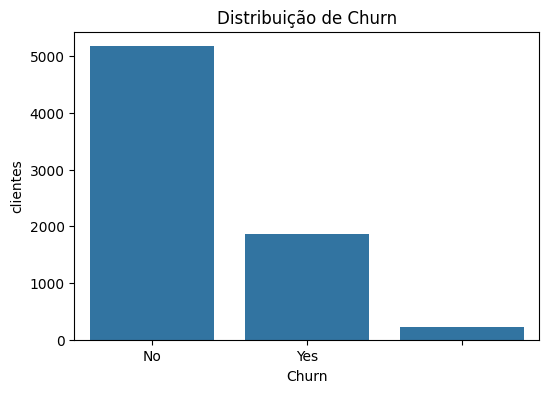

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizando a ditribuição de 'Churn' como variável
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df_telecom_normalizado)
plt.title('Distribuição de Churn')
plt.xlabel('Churn')
plt.ylabel('clientes')
plt.show()

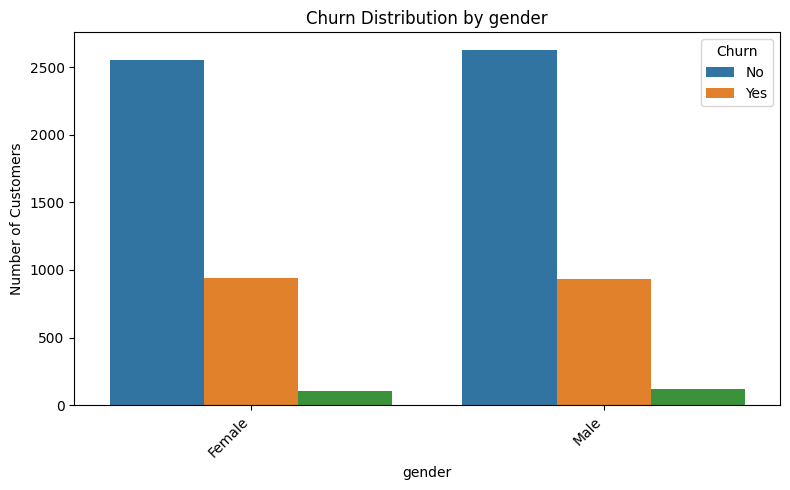

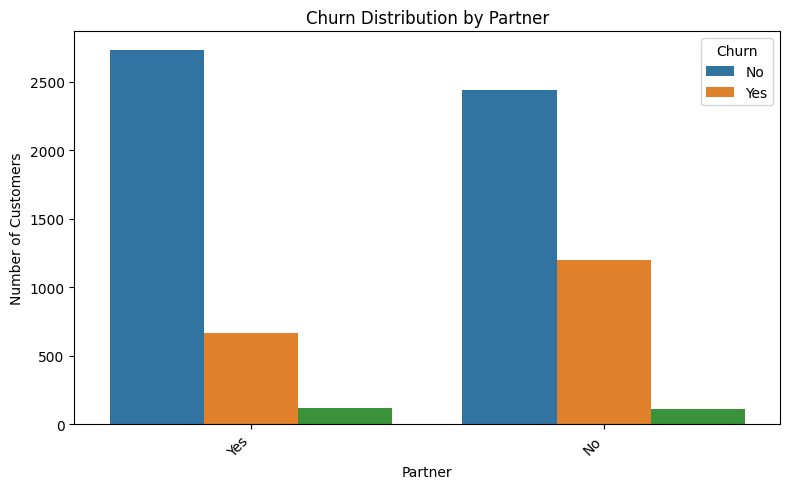

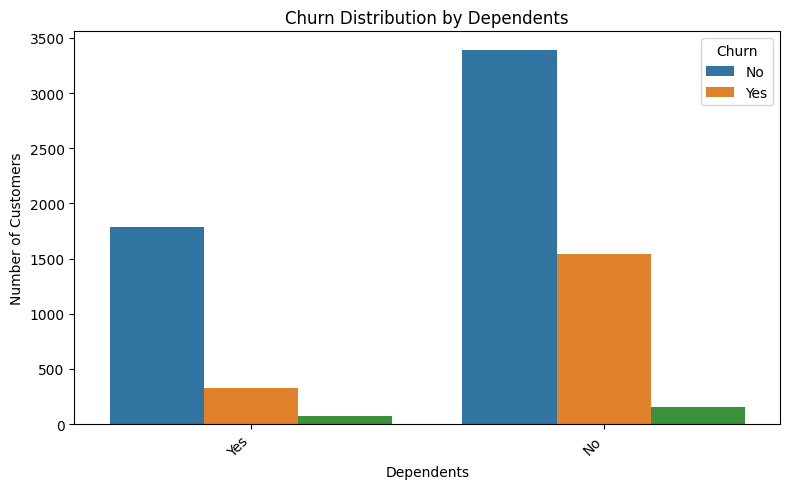

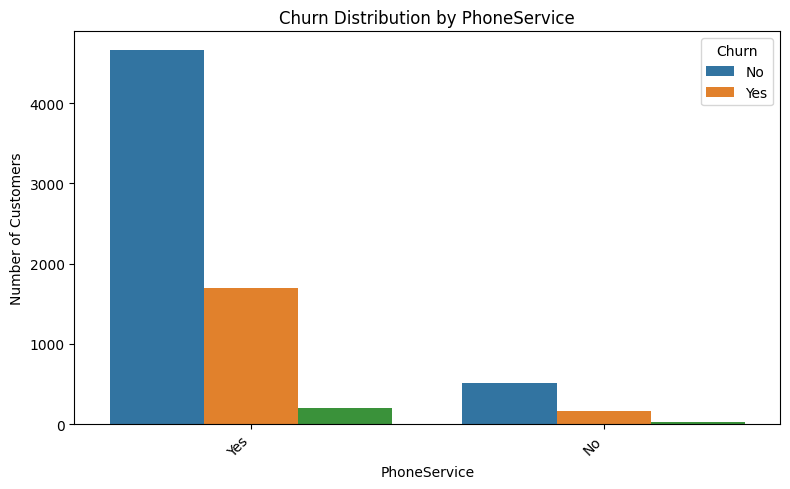

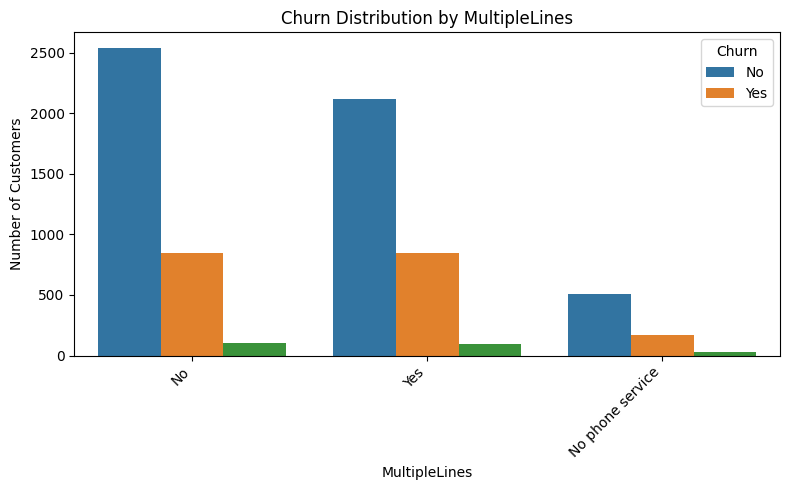

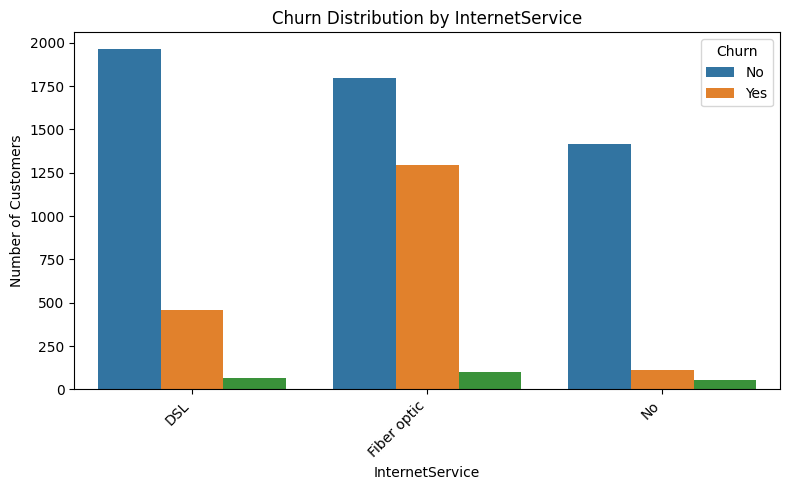

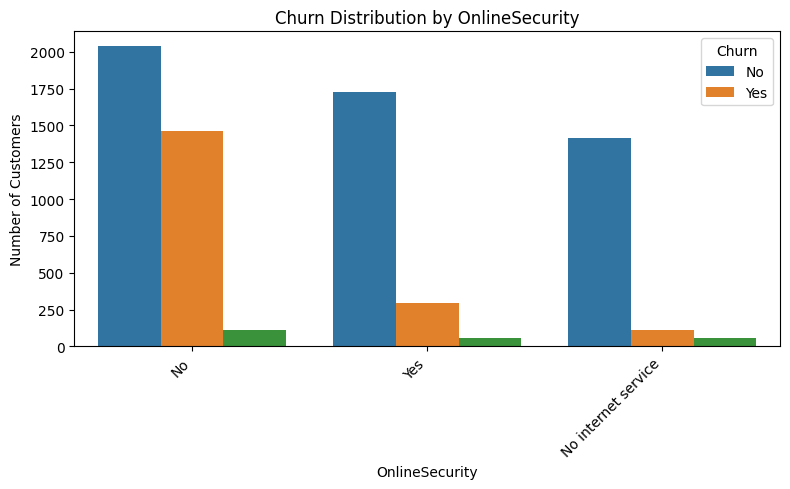

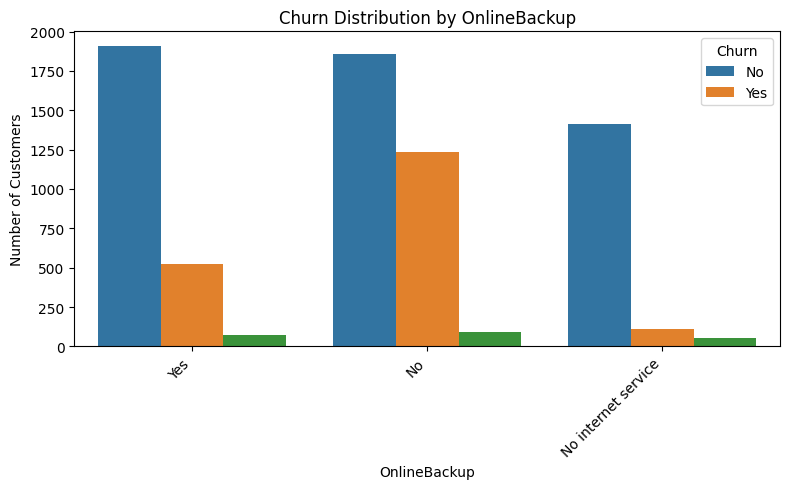

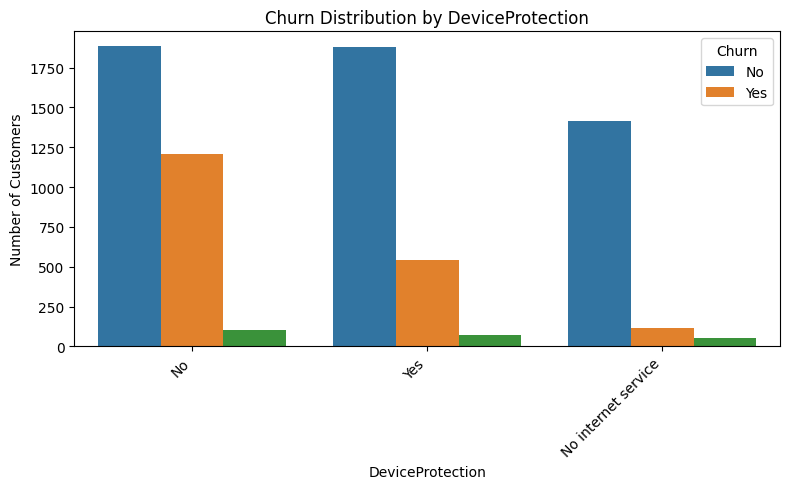

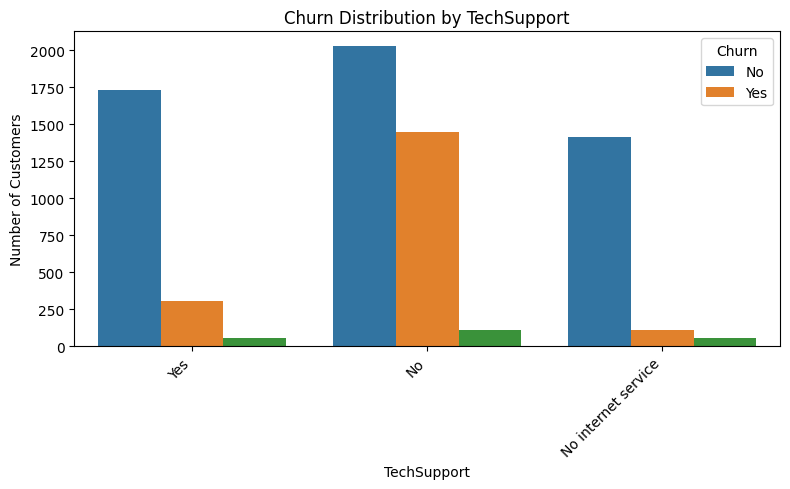

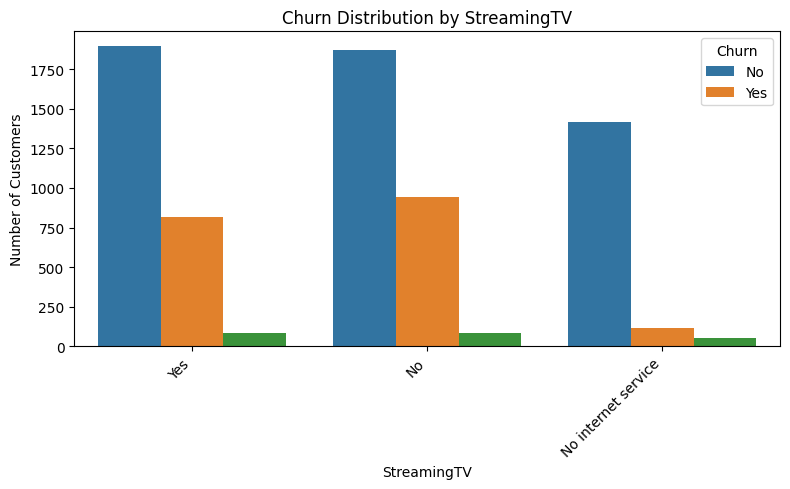

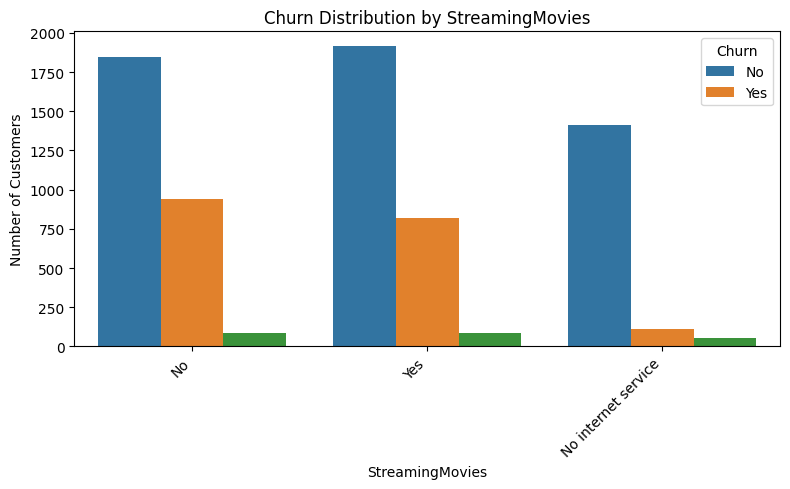

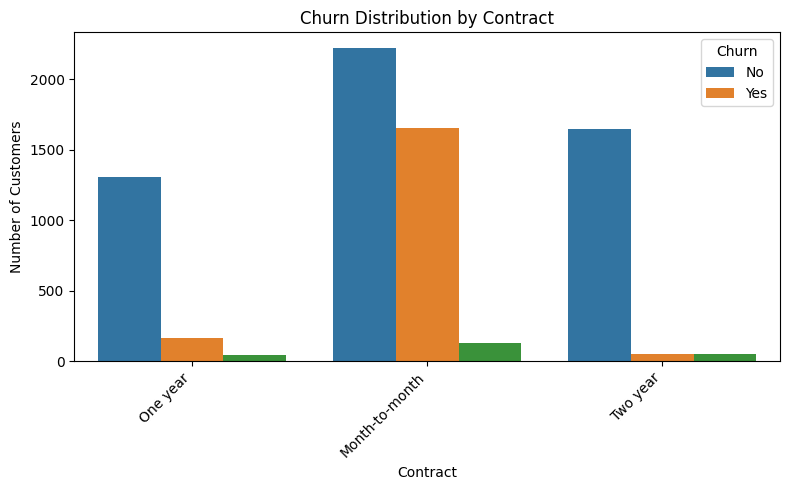

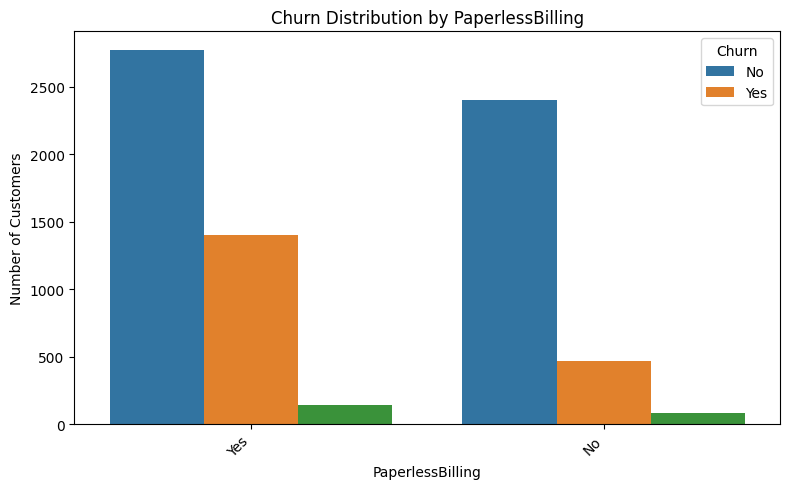

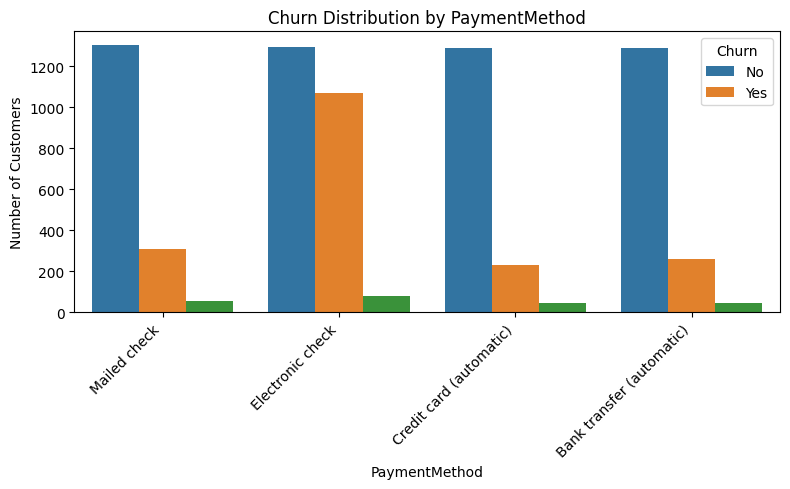

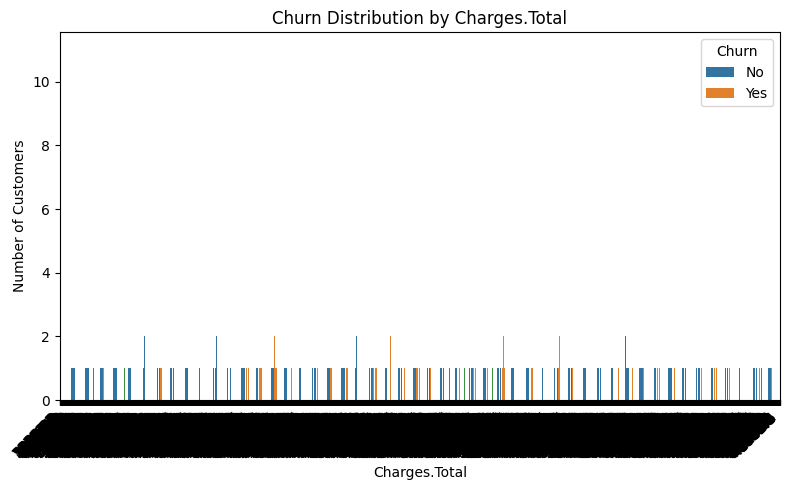

In [58]:
categorical_cols = df_telecom_normalizado.select_dtypes(include='object').columns.tolist()
# Excluindo 'customerID' and 'Churn' da lista da coluna categorical
categorical_cols.remove('customerID')
categorical_cols.remove('Churn')

# Plotando a distribuição de Churn cada um de categorical
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, hue='Churn', data=df_telecom_normalizado)
    plt.title(f'Churn Distribution by {col}')
    plt.xlabel(col)
    plt.ylabel('Number of Customers')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

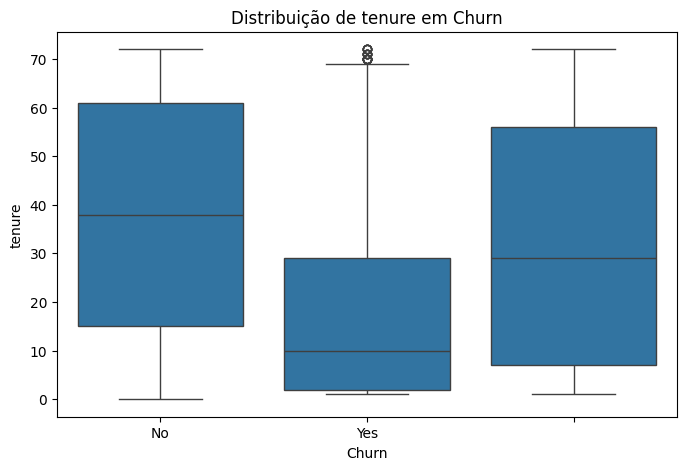

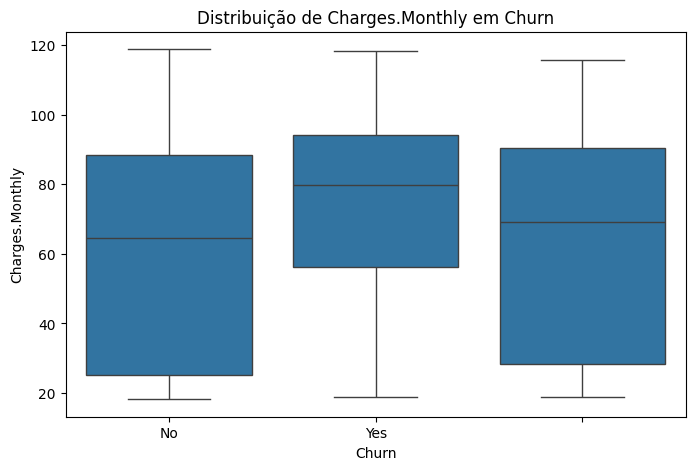

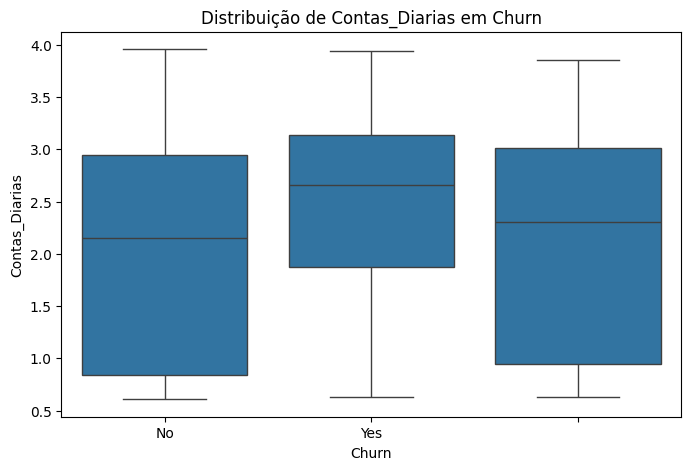

In [59]:
numerical_cols = df_telecom_normalizado.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Excluindo 'SeniorCitizen', pois é uma representação numérica de uma variável categórica
numerical_cols.remove('SeniorCitizen')

# Plotando a  distribuição de variáveis numéricas por rotatividade
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Churn', y=col, data=df_telecom_normalizado)
    plt.title(f'Distribuição de {col} em Churn')
    plt.xlabel('Churn')
    plt.ylabel(col)
    plt.show()

In [60]:
#Salvando o projeto em csv
df_telecom_normalizado.to_csv('df_telecom_tratado.csv', index=False)

#📄Relatorio Final

# Relatório de Análise de Evasão de Clientes (Churn)

## Introdução

O objetivo desta análise é explorar e entender o fenômeno da evasão de clientes (Churn) na TelecomX. A evasão de clientes é um desafio significativo para as empresas de telecomunicações, impactando a receita e o crescimento. Compreender os fatores que levam os clientes a cancelar seus serviços é crucial para desenvolver estratégias eficazes de retenção.

## Limpeza e Tratamento de Dados

Os dados foram obtidos a partir de um arquivo JSON hospedado em um repositório do GitHub. O processo de tratamento de dados envolveu os seguintes passos:

1.  **Importação dos Dados:** O arquivo JSON foi lido utilizando a biblioteca pandas.
2.  **Normalização dos Dados:** As colunas aninhadas ('customer', 'phone', 'internet', 'account') foram normalizadas e combinadas com as colunas 'customerID' e 'Churn' em um único DataFrame (`df_telecom_normalizado`).
3.  **Verificação de Tipos de Dados:** A função `info()` foi utilizada para inspecionar os tipos de dados das colunas. Foi observado que a coluna 'Charges.Total' era do tipo 'object', o que indicava a necessidade de conversão para um tipo numérico para análise posterior.
4.  **Criação de Nova Coluna:** Uma nova coluna chamada 'Contas_Diarias' foi criada dividindo-se 'Charges.Monthly' por 30 para obter uma estimativa do custo diário.
5.  **Verificação de Valores Nulos e Duplicados:** As funções `isnull().sum()` e `duplicated().sum()` foram utilizadas para verificar a presença de valores nulos e duplicados no DataFrame. Nulos e duplicados não foram encontrados nas colunas verificadas.
6. **Tratamento de Inconsistência:** A coluna 'Charges.Total' foi convertida para tipo numérico, utilizando `errors='coerce'` para tratar possíveis valores inconsistentes, embora a verificação posterior não tenha encontrado valores nulos resultantes dessa conversão, sugerindo a ausência de inconsistências nesse caso específico.

## Análise Exploratória de Dados

Foram realizadas análises exploratórias para visualizar a distribuição da evasão e sua relação com outras variáveis:

1.  **Distribuição de Churn:** Um gráfico de contagem (`countplot`) foi gerado para visualizar a proporção de clientes que evadiram ('Yes') e os que não evadiram ('No'). O gráfico mostrou que a maioria dos clientes não evadiu.
2.  **Distribuição de Churn por Variáveis Categóricas:** Gráficos de contagem foram criados para visualizar a distribuição de Churn em relação a diversas variáveis categóricas (gênero, serviço telefônico, múltiplas linhas, serviço de internet, segurança online, backup online, proteção de dispositivo, suporte técnico, streaming de TV, streaming de filmes, tipo de contrato, cobrança sem papel e método de pagamento). Esta análise revelou padrões na evasão entre diferentes categorias.
3.  **Distribuição de Variáveis Numéricas por Churn:** Box plots foram gerados para comparar a distribuição de variáveis numéricas ('tenure', 'Charges.Monthly', 'Contas_Diarias') entre clientes que evadiram e os que não evadiram. Essa visualização ajudou a identificar se há diferenças significativas nos valores dessas variáveis para os dois grupos.

## Conclusões e Insights

Com base na análise exploratória, podemos tirar algumas conclusões e obter insights:

*   A taxa de evasão não é uniformemente distribuída entre todos os clientes.
*   Certos grupos de clientes, definidos por variáveis categóricas, parecem ter maior propensão à evasão. Por exemplo, clientes com determinados tipos de contrato ou métodos de pagamento podem apresentar taxas de evasão mais altas.
*   As variáveis numéricas também mostram diferenças na distribuição entre clientes que evadiram e os que não evadiram, indicando que o tempo de contrato, os gastos mensais e diários podem estar relacionados ao Churn.

## Recomendações

Com base nesta análise inicial, algumas recomendações podem ser feitas para reduzir a evasão de clientes:

*   **Identificar e Segmentar Clientes de Risco:** Utilize os insights obtidos das variáveis categóricas e numéricas para identificar os segmentos de clientes com maior probabilidade de evadir.
*   **Campanhas de Retenção Direcionadas:** Desenvolva campanhas de marketing e ofertas personalizadas para os segmentos de alto risco. Por exemplo, oferecer descontos, planos de contrato mais longos ou benefícios adicionais.
*   **Melhorar a Experiência do Cliente:** Investigue os motivos por trás da evasão em segmentos específicos. Se o método de pagamento ou tipo de serviço de internet estão correlacionados com a evasão, pode ser necessário melhorar a infraestrutura ou as opções de pagamento.
*   **Análise Mais Profunda:** Realizar análises mais aprofundadas, como modelagem preditiva de Churn, para identificar os fatores mais influentes e prever quais clientes provavelmente evadirão no futuro.

#Telecom Fase 2

In [62]:
url_2 =('/content/df_telecom_tratado.csv')

In [63]:
dt_telecom_tratado = pd.read_csv(url_2)
dt_telecom_tratado.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Contas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,2.796667


In [64]:
#Eliminando colunas que não trazem valor para análise de evasão de clientes
dt_telecom_tratado = dt_telecom_tratado.drop(['customerID', 'Charges.Total'], axis=1)
dt_telecom_tratado.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Contas_Diarias
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,2.186667
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,1.996667
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,2.463333
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,3.266667
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,2.796667


In [68]:
# Atualizar categorical_cols para excluir 'Charges.Total'
if 'Charges.Total' in categorical_cols:
    categorical_cols.remove('Charges.Total')

# Executando codificação one-hot
dt_telecom_encoded = pd.get_dummies(dt_telecom_tratado, columns=categorical_cols, drop_first=True)
display(dt_telecom_encoded.head())

,Churn,SeniorCitizen,tenure,Charges.Monthly,Contas_Diarias,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,No,0,9,65.6,2.186667,False,True,True,True,False,...,False,True,False,False,True,False,True,False,False,True
1,No,0,9,59.9,1.996667,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,True
2,Yes,0,4,73.9,2.463333,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
3,Yes,1,13,98.0,3.266667,True,True,False,True,False,...,False,True,False,True,False,False,True,False,True,False
4,Yes,1,3,83.9,2.796667,False,True,False,True,False,...,False,True,False,False,False,False,True,False,False,True
